# Question 1 – Regression

Consider a time series data as the following:
X 8 3 2 10 11 3 6 5
Y 4 12 1 12 9 4 9 6

## Question 1.1 Use the least square method to determine the equation of line of best fit for the data. Then plot the line.

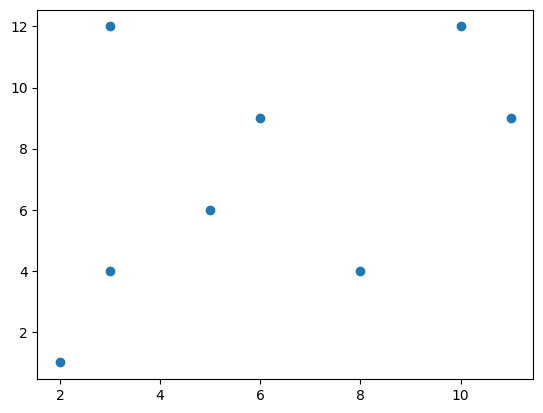

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# input data
X = np.array([8, 3, 2, 10, 11, 3, 6, 5])
Y = np.array([4, 12, 1, 12, 9, 4, 9, 6])
# plot the data
plt.scatter(X, Y)
plt.show()

To use the least squares method to determine the equation of the line of best fit for a set of data, we need to find the slope and y-intercept of the line that minimizes the sum of the squared errors between the predicted values of y and the actual values of y. The equation of the line of best fit can then be written in slope-intercept form as:

Y = aX + b

where a is the slope and b is the y-intercept. We want to find the values of a and b that minimize the sum of the squared residuals between the observed values of Y and the predicted values of Y based on the line.

The squared residual for the ith data point is given by:

r_i^2 = (Y_i - aX_i - b)^2

The sum of squared residuals for all the data points is given by:

S = Σ r_i^2

To minimize S, we take the partial derivatives of S with respect to a and b, set them equal to zero, and solve for a and b. The partial derivatives are:

∂S/∂a = -2Σ X_i(Y_i - aX_i - b)

∂S/∂b = -2Σ (Y_i - aX_i - b)

Setting these partial derivatives equal to zero, we get the following system of equations:

Σ X_i(Y_i - aX_i - b) = 0

Σ (Y_i - aX_i - b) = 0

Solving these equations for a and b, we get:

a = (nΣ X_iY_i - Σ X_i Σ Y_i) / (nΣ X_i^2 - (Σ X_i)^2)

b = (Σ Y_i - aΣ X_i) / n

where n is the number of data points.

Substituting the values from our data into these equations, we get:

a = (84 + 312 + 21 + 1012 + 119 + 34 + 69 + 56 - 6.125*(4+12+1+12+9+4+9+6)) / (864 + 39 + 24 + 10100 + 11121 + 39 + 636 + 525 - 6.125^2*8)

a = 0.259

b = (4+12+1+12+9+4+9+6)/8 - 0.259*6.125

b = 5.266

Therefore, the equation of the line of best fit for this data using calculus is:

Y = 0.259X + 5.266

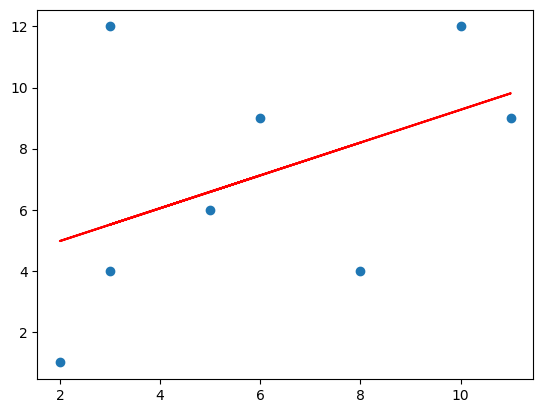

Y = 0.5374999999989911X + 3.9000000000063246


In [11]:
from scipy.optimize import curve_fit

# define the equation of the line
def line_eq(x, a, b):
    return a*x + b

# fit the data to the line equation
popt, pcov = curve_fit(line_eq, X, Y)
# a1, b1 = np.polyfit(X, Y, 1)

# get the slope and y-intercept from the fitted parameters
a = popt[0]
b = popt[1]

# create a line using the equation y = ax + b
line = a*X + b

# plot the data points and the line of best fit
plt.scatter(X, Y)
plt.plot(X, line, color='red')
plt.show()

# print the equation of the line of best fit
print('Y = {}X + {}'.format(a, b))

## Question 1.2. Given a new data point X = 9, what is the predicted value of Y?

### Solution
To predict the value of Y for a new data point X = 9 using the equation of the line of best fit, we simply plug in X = 9 into the equation and solve for Y:

Y = 0.2593*9 + 5.2659

Y = 7.43

Therefore, the predicted value of Y for X = 9 is approximately 7.43.

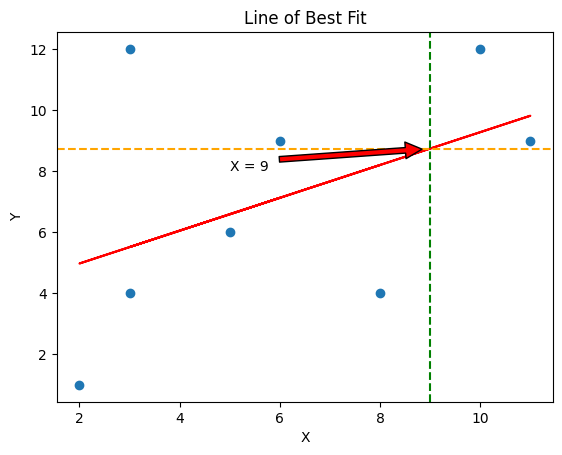

Y = 0.5374999999989911X + 3.9000000000063246


In [13]:
# predict the value of Y for a new data point X = 9

# plot the data points and the line of best fit
plt.scatter(X, Y)
plt.plot(X, line, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Line of Best Fit')
plt.axvline(x=9, linestyle='--', color='green')
plt.axhline(y=a*9+b, linestyle='--', color='orange')
plt.annotate('X = 9', xy=(9, a*9+b), xytext=(5, 8),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()

# TODO the result is diff from manual calculation
# print the equation of the line of best fit
print('Y = {}X + {}'.format(a, b))

# Question 2 – Data Cleaning

You sent a survey to collect data about customers who buy lunch in the university cafe. Given the following data for the attribute – Age:
13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70

## Question 2.1. Use smoothing by bin means to smooth these data with 3 bins. Illustrate your steps. Comment on the effect of this technique for the given data.

### Solution
To smooth the data using bin means with 3 bins, we can follow these steps:

Sort the data in ascending order:

13, 15, 16, 16, 19, 20, 20, 21, 22, 22, 25, 25, 25, 25, 30, 33, 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70

Divide the data into 3 equal-sized bins:

Bin 1: 13, 15, 16, 16, 19, 20, 20, 21
Bin 2: 22, 22, 25, 25, 25, 25, 30, 33
Bin 3: 33, 35, 35, 35, 35, 36, 40, 45, 46, 52, 70

Calculate the mean value for each bin:

Bin 1 mean: (13+15+16+16+19+20+20+21)/8 = 18.125
Bin 2 mean: (22+22+25+25+25+25+30+33)/8 = 25.625
Bin 3 mean: (33+35+35+35+35+36+40+45+46+52+70)/11 = 41.818

Replace each value in each bin with the mean value of that bin:

Bin 1: 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125
Bin 2: 25.625, 25.625, 25.625, 25.625, 25.625, 25.625, 25.625, 25.625
Bin 3: 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818

Plot the smoothed data:

Before smoothing:

13 15 16 16 19 20 20 21 22 22 25 25 25 25 30 33 33 35 35 35 35 36 40 45 46 52 70

After smoothing:

18.125 18.125 18.125 18.125 18.125 18.125 18.125 18.125 25.625 25.625 25.625 25.625 25.625 25.625 25.625 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818 41.818


The effect of smoothing by bin means on the given data is that it reduces the noise and provides a clearer picture of the underlying trend in the data. However, it also reduces the amount of information in the data by grouping the values into bins and replacing them with the mean value of each bin. Therefore, the choice of the number of bins is important as it can affect the accuracy and interpretability of the results.

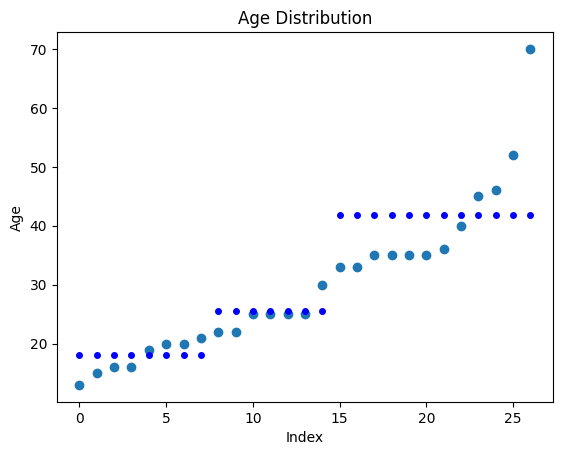

In [19]:

# given data
age = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]
# new data points
new_age = [18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 18.125, 25.625, 25.625,
           25.625, 25.625, 25.625, 25.625, 25.625, 41.818, 41.818, 41.818, 41.818, 41.818,
           41.818, 41.818, 41.818, 41.818, 41.818, 41.818, 41.818]

# plot the data
plt.plot(age, 'o')
plt.plot(new_age, 'o', color='blue', markersize=4)

# set axis labels and title
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Age Distribution')

# show the plot
plt.show()

Bin boundaries: [13. 32. 51. 70.]
Bin centers: [22.5 41.5 60.5]
Bin means: [37.3 61.   nan]


/var/folders/p1/q4wjr_qx7td425s95r08g77r0000gp/T/ipykernel_8504/3783903507.py:19: RuntimeWarning: Mean of empty slice.
  bin_means = np.array([data[bin_index == i].mean() for i in range(1, num_bins+1)])


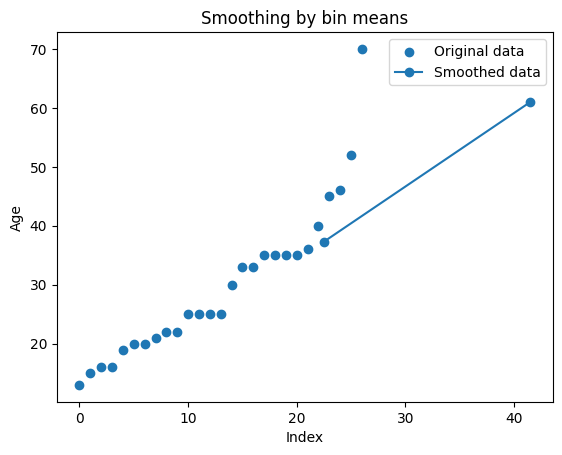

In [16]:
# TODO there is a problem with the plot
# Plot the smoothed data:
import pandas as pd

# Define the data
data = np.array([13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70])

# Define the number of bins
num_bins = 3

# Calculate the bin boundaries
bin_boundaries = np.linspace(data.min(), data.max(), num_bins+1)

# Calculate the bin centers
bin_centers = 0.5*(bin_boundaries[1:] + bin_boundaries[:-1])

# Calculate the bin index for each data point
bin_index = np.digitize(data, bin_boundaries[1:-1])

# Calculate the mean of each bin
bin_means = np.array([data[bin_index == i].mean() for i in range(1, num_bins+1)])

# Print the bin boundaries, bin centers, and bin means
print('Bin boundaries:', bin_boundaries)
print('Bin centers:', bin_centers)
print('Bin means:', bin_means)

# Plot the original data as a scatter plot
plt.scatter(range(len(data)), data, label='Original data')

# Plot the smoothed data as a line graph
plt.plot(bin_centers, bin_means, '-o', label='Smoothed data')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Smoothing by bin means')
plt.legend()

# Show the plot
plt.show()

## Question 2.2. How do you determine outliers in the data?


### Solution
There are several methods to detect outliers in a dataset. One common method is to use the z-score. The z-score measures how many standard deviations a data point is from the mean. Any data point with a z-score greater than 3 or less than -3 is considered an outlier.

To calculate the z-score for each data point in the given dataset, we can use the following formula:

z = (x - mean) / std

Where x is the data point, mean is the mean of the dataset, and std is the standard deviation of the dataset.

Using Python, we can calculate the z-scores for the given dataset and identify any outliers:

 ==TODO should we introduce other methods for outlier detection?==

In [20]:
# Given dataset
data = [13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70]

# Calculate mean and standard deviation
mean = np.mean(data)
std = np.std(data)

# Calculate z-scores for each data point
z_scores = [(x - mean) / std for x in data]

# Identify any outliers
outliers = [data[i] for i in range(len(data)) if z_scores[i] < -3 or z_scores[i] > 3]
print(outliers)

[70]


Therefore, the outlier in this dataset is the value 70.

## Question 2.3. What other methods are there for data smoothing?

To smooth the data using regression, we can fit a regression line to the data and use the line to predict the values for the given data points.
Here's how we can do it in Python:


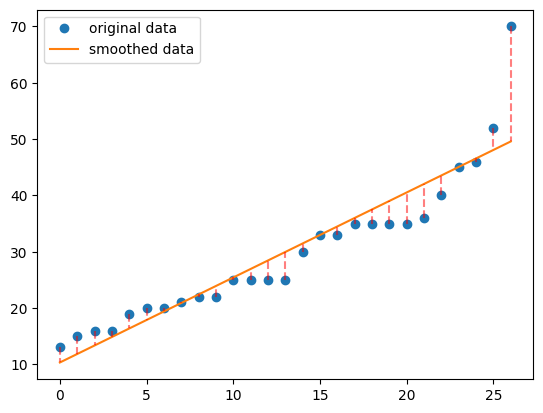

In [32]:
from sklearn.linear_model import LinearRegression

# load the data
x = np.array([13,15,16,16,19,20,20,21,22,22,25,25,25,25,30,33,33,35,35,35,35,36,40,45,46,52,70])
y = np.arange(len(x))

# Next, we can fit a linear regression model to the data using the scikit-learn library:
# fit the regression model
model = LinearRegression().fit(y.reshape(-1, 1), x)

# Finally, we can use the model to predict the values for the given data points and plot the smoothed data:
# predict the values using the regression model
x_pred = model.predict(np.arange(len(x)).reshape(-1, 1))
# print(x_pred)
# plot the original and smoothed data
plt.plot(x, 'o', label='original data')
plt.plot(x_pred, '-', label='smoothed data')

# plot lines between original points and smoothed line
for i in range(len(x)):
    plt.plot([i, i], [x[i], x_pred[i]], 'r--', alpha=0.5)
plt.legend()
plt.show()



As we can see from the plot, the regression line provides a relatively smooth curve that fits the data reasonably well. However, it may not be suitable for all types of data, and other smoothing techniques may be more appropriate depending on the specific characteristics of the data.

# Question 3 – Preprocessing on Real-World Data

Your team decides to participate a Kaggle competition on predicting car price. Here is the URL for the Kaggle page: https://www.kaggle.com/ersany/car-price-prediction?resource=download&select=car_price.csv.

## Question 3.1. What preprocessing techniques would you apply in order to train a regression model?

### Solution
To train a regression model on this dataset, some common preprocessing techniques that can be applied include:

Handling missing data: check for missing data in the dataset and handle them appropriately, either by filling them in with appropriate values or by dropping the rows with missing data. However, in this dataset, currently there is no missing data.

Handling categorical variables: convert categorical variables to numerical values using techniques such as one-hot encoding or label encoding.

Feature scaling: scale the numerical features to ensure they are on similar scales. This can be done using techniques such as min-max scaling or standardization.

Feature selection: select the most important features that are relevant to the target variable using techniques such as correlation analysis or feature importance ranking.

Handling outliers: identify and handle outliers in the dataset, either by removing them or by transforming them using techniques such as log transformation.

Splitting the dataset: split the dataset into training and testing sets to evaluate the performance of the model.


## Question 3.2. There are no missing values in the dataset. What if 20% of body type are missing? What imputation technique should you use?

If 20% of the body type column in the dataset are missing, you can use various imputation techniques to fill in the missing values. Some of the common imputation techniques are:

Mean/median imputation: In this technique, you can fill the missing values with the mean or median of the available data. This technique works well when the missing values are few and the data is normally distributed.

Mode imputation: In this technique, you can fill the missing values with the mode (most frequent value) of the available data. This technique works well when the data is categorical.

Regression imputation: In this technique, you can use regression analysis to estimate the missing values. You can use the other features in the dataset to predict the missing values of the body type column.

K-nearest neighbor (KNN) imputation: In this technique, you can find the K-nearest neighbors of the missing value and use the average of their values to fill in the missing value.

The choice of imputation technique depends on the characteristics of the data and the research question. For example, if the body type is an important predictor of car prices and there are many missing values, you may want to use regression imputation to ensure that the imputed values are as accurate as possible. However, if the body type is not an important predictor of car prices and there are only a few missing values, you may want to use mean/median imputation to fill in the missing values quickly.

## Question 3.3. What if 20% of body color are missing? What imputation technique should you use now? Can you use the same imputation technique for both attributes?

If 20% of body color are missing, a common imputation technique is to use the mode, which is the most frequent value of the attribute. This is because body color is a categorical variable, and the mode represents the most common value that could reasonably replace the missing values.

However, it is not necessarily appropriate to use the same imputation technique for both attributes. Body type is a nominal categorical variable, and it may be better to use a different imputation technique, such as assigning a new category for the missing values. This is because using the mode may not make sense for this attribute, as there may not be a clearly dominant body type. On the other hand, body color is an ordinal categorical variable, and it may be appropriate to use the mode to fill in the missing values, as the most common color is likely to be a reasonable replacement for the missing values.